# Introduction

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

# Understanding the Data

This dataset has 2 files as explained below: 

1. 'application_data.csv'  contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [131]:
#importing the required pandas libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [132]:
import pandas_profiling as pp
#Display all columns in data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) #Also setting to display maximum rows

In [128]:
#Reading Application Data File
df = pd.read_csv('application_data.csv')


In [129]:
# Browse through first 5 lines of  Dataset to get a feel of data
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [130]:
#Missing Values Percentage for Each Column

missing_data_percentage= (100 * df.isnull().sum()/df.shape[0]).sort_values(ascending = False)
missing_data_percentage.to_frame('Percentage of Missing Values').reset_index()

,index,Percentage of Missing Values
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MODE,69.432963
4,NONLIVINGAPARTMENTS_MEDI,69.432963
5,NONLIVINGAPARTMENTS_AVG,69.432963
6,FONDKAPREMONT_MODE,68.386172
7,LIVINGAPARTMENTS_MEDI,68.354953
8,LIVINGAPARTMENTS_MODE,68.354953
9,LIVINGAPARTMENTS_AVG,68.354953


In [106]:
#Info about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

***In the following step, we drop the columns which has more than 50% missing values using drop function***

In [107]:
df.drop(missing_data_percentage.where(missing_data_percentage.values > 50).dropna().keys(),axis=1,inplace=True)

```Columns which has less missing percentage and which can be imputed```

*As seen from the above missing percentage table, the following columns has around 13% missing values*
1. AMT_REQ_CREDIT_BUREAU_QRT
2. AMT_REQ_CREDIT_BUREAU_YEAR
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_DAY
6. AMT_REQ_CREDIT_BUREAU_HOUR

In [133]:
modified_df = df.fillna({'AMT_REQ_CREDIT_BUREAU_QRT':round(df['AMT_REQ_CREDIT_BUREAU_QRT'].median()),'AMT_REQ_CREDIT_BUREAU_DAY':round(df['AMT_REQ_CREDIT_BUREAU_DAY'].mean())})
modified_df.fillna({'AMT_REQ_CREDIT_BUREAU_HOUR':round(df['AMT_REQ_CREDIT_BUREAU_HOUR'].median()),'AMT_REQ_CREDIT_BUREAU_WEEK':round(df['AMT_REQ_CREDIT_BUREAU_WEEK'].median())},inplace=True)
modified_df.fillna({'AMT_REQ_CREDIT_BUREAU_YEAR':round(df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()),'AMT_REQ_CREDIT_BUREAU_MON':round(df['AMT_REQ_CREDIT_BUREAU_MON'].median())},inplace=True)

```Imputing Values Explanation```
1. The afore-mentioned 6 columns are considered for imputation
2. Given that these columns describe Number of enquiries to Credit Bureau about the client for various duration of time, we can choose either mean or median to fill the missing values.
3. Some of the columns have outliers (for eg: 261 in AMT_REQ_CREDIT_BUREAU_QRT). Hence it is safe to consider median than mean for filling the missing values

In [134]:
#Describe our data frame
modified_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

1. *As some of the days column contains ```outlier values```, we are considering only the days which has value less than 0*
2. *By doing this, we filter out those incorrect values, which will be a* ***thorn in our analysis***

In [135]:
#Removing the outlier values i.e removing days of employment , days of birth which are greater than 0
mod_df = modified_df.loc[(modified_df.DAYS_BIRTH < 0) & (modified_df.DAYS_EMPLOYED < 0) & (modified_df.DAYS_ID_PUBLISH < 0)]

In [136]:
columns_considered = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                      'CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                      'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                      'DAYS_BIRTH','DAYS_EMPLOYED',
                      'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
                      'OCCUPATION_TYPE','CNT_FAM_MEMBERS','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
                      'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                      'LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE']

In [137]:
#Selecting subset of Columns from the list of columns provided above
analysis_df = mod_df[mod_df.columns[mod_df.columns.isin(columns_considered)]]

In [138]:
#Creating two derived columns namely Age of the applicants and Years employed from given columns. 
#The given columns DAYS_BIRTH and DAYS_EMPLOYED are provided in days. Hence dividing them by 365.25 to get years.
#As the days are in negative values, finding absolute of them and then rounding to no decimal
#Ignoring the SettingWithCopyWarning 
pd.options.mode.chained_assignment = None
analysis_df['AGE_OF_APPLICANT'] = round(abs(analysis_df.DAYS_BIRTH/365.25))
analysis_df['YEARS_EMPLOYED'] = round(abs(analysis_df.DAYS_EMPLOYED/365.25))

In [139]:
#Dropping the days column as they have served the purpose
analysis_df.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis=1,inplace=True)

In [140]:
#Converting String Data Types to Boolean Data Types. 

analysis_df['FLAG_MOBIL'] = analysis_df['FLAG_MOBIL'].astype(bool)
analysis_df['FLAG_EMP_PHONE'] = analysis_df['FLAG_EMP_PHONE'].astype(bool)
analysis_df['FLAG_WORK_PHONE'] = analysis_df['FLAG_WORK_PHONE'].astype(bool)
analysis_df['FLAG_CONT_MOBILE'] = analysis_df['FLAG_CONT_MOBILE'].astype(bool)
analysis_df['FLAG_PHONE'] = analysis_df['FLAG_PHONE'].astype(bool)
analysis_df['FLAG_EMAIL'] = analysis_df['FLAG_EMAIL'].astype(bool)

In [141]:
#Sorting based on Income Column
analysis_df.AMT_INCOME_TOTAL.sort_values(ascending=False).head(5)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
Name: AMT_INCOME_TOTAL, dtype: float64

1. Amount column has outliers which needs to be removed to identify the distribution of income.
2. The outlier column's index is 12840 (as seen from previous line of code)

In [142]:
#Creating a new DF for Bin anlaysis of income category
bin_analysis = analysis_df.drop(index=12840)

In [143]:
#Binning the Income into multiple buckets of 10000,50000,100000,500000,1000000 using pd.cut function
pd.set_option('display.max_rows', 200)
analysis_df['INCOME_CATEGORY'] = pd.cut(analysis_df['AMT_INCOME_TOTAL'], [10000,50000,100000,500000,1000000], labels=['10000-50000', '50000-100000', '100000-500000','500000-1000000'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

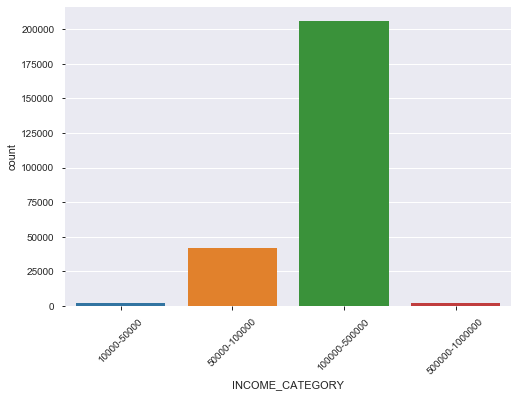

In [144]:
#Creating a count plot to visualize the distribution of income across buckets
sns.countplot(analysis_df['INCOME_CATEGORY'])
plt.xticks(rotation=45)

```Insights```

1. As seen from above count plot, most(around 2.1 lakhs) of the applicants reside in the income category of 100000 to 500000
2. Applicants from 50000-100000 category are just below 50000
3. Applicants in other income category are very minimal for the given data

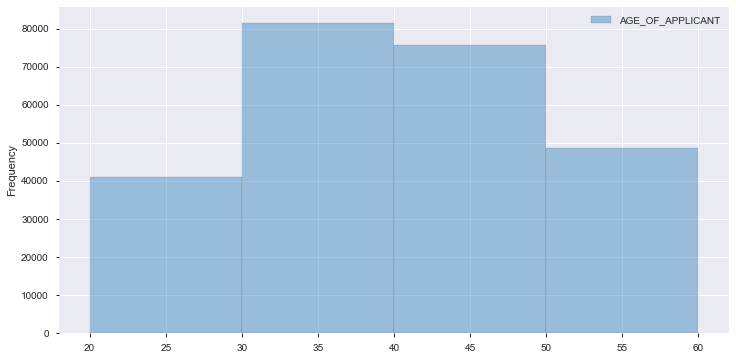

In [145]:
#Binning of Age Category

bins = [20, 30,40,50,60]
analysis_df['AGE_OF_APPLICANT'].plot(kind='hist', bins=bins, figsize=[12,6], alpha=.4, legend=True,edgecolor="k")

```Insights```

1. Maximum number of applicants resides in the age category 30-40, closely followed by 40-50

### Splitting data frame into two frame as Non-Defaulter and Defaulter

In [146]:
#imbalance percentage
#Creating two data frames , one pertaining to Defaulter and another one for non-defaulter
non_defaulter = analysis_df[analysis_df['TARGET']==0]
defaulter = analysis_df[analysis_df['TARGET']==1]
print('The percentage of non-defaulter is '+ str(round(100 * nondefaulter.shape[0]/analysis_df.shape[0],2)))
print('The percentage of defaulter is '+ str(round(100 * defaulter.shape[0]/analysis_df.shape[0],2)))

The percentage of non-defaulter is 91.34
The percentage of defaulter is 8.66


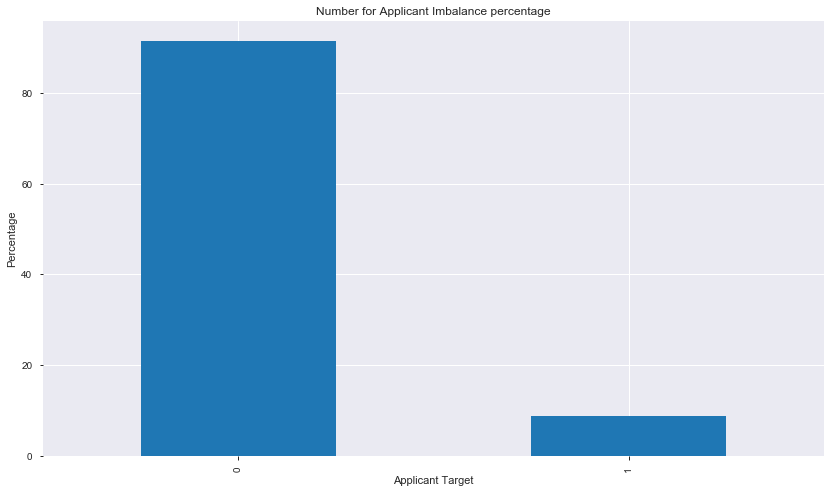

In [147]:
#Plotting the imbalance percentage
ax = analysis_df['TARGET'].value_counts(normalize=True).mul(100).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for Applicant Imbalance percentage")
ax.set_xlabel("Applicant Target")
ax.set_ylabel("Percentage")
plt.show()

As seen from the above graph there is a huge imbalance in percentage of default ( around 8%) to that of non-default (around 92%)

In [123]:
#Non-Defaulter Data Frame
non_defaulter.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE_OF_APPLICANT,YEARS_EMPLOYED
count,230288.000000,230288.0,230288.000000,2.302880e+05,2.302880e+05,230276.000000,2.300510e+05,230286.000000,230288.000000,230288.000000,230288.000000,230288.000000,230288.000000,230288.000000,230288.000000,230288.000000
mean,278160.601265,0.0,0.496700,1.764979e+05,6.164767e+05,27902.517331,5.551829e+05,2.253051,0.017066,0.061766,0.049707,0.086075,0.275077,0.215864,40.639291,6.676284
std,102857.124689,0.0,0.761312,1.154978e+05,4.114329e+05,14834.207366,3.781456e+05,0.939246,0.129516,0.240731,0.217340,0.280475,0.446554,0.411422,10.044418,6.500671
min,100003.000000,0.0,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,188934.750000,0.0,0.000000,1.125000e+05,2.762775e+05,16969.500000,2.475000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,2.000000
50%,278203.500000,0.0,0.000000,1.575000e+05,5.212800e+05,25843.500000,4.500000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,5.000000
75%,367238.250000,0.0,1.000000,2.160000e+05,8.353800e+05,35743.500000,7.020000e+05,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,48.000000,9.000000
max,456255.000000,0.0,19.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69.000000,49.000000


In [124]:
#defaulter Data Frame
defaulter.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE_OF_APPLICANT,YEARS_EMPLOYED
count,21832.000000,21832.0,21832.000000,2.183200e+04,2.183200e+04,21832.000000,2.181300e+04,21832.000000,21832.000000,21832.000000,21832.000000,21832.000000,21832.000000,21832.000000,21832.000000,21832.000000
mean,277645.158117,1.0,0.517726,1.697583e+05,5.577250e+05,26859.484037,4.883938e+05,2.246977,0.019100,0.063576,0.048369,0.128710,0.344449,0.252015,38.290674,4.968441
std,102369.054202,0.0,0.782145,7.956693e+05,3.460552e+05,12475.806403,3.107725e+05,0.971970,0.136881,0.244002,0.214550,0.334887,0.475199,0.434180,9.695391,5.072419
min,100002.000000,1.0,0.000000,2.700000e+04,4.500000e+04,2844.000000,4.500000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,189838.250000,1.0,0.000000,1.125000e+05,2.844000e+05,17735.625000,2.385000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,2.000000
50%,276411.000000,1.0,0.000000,1.440000e+05,4.959855e+05,25578.000000,4.500000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,3.000000
75%,366373.500000,1.0,1.000000,2.025000e+05,7.290000e+05,33394.500000,6.750000e+05,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,45.000000,7.000000
max,456254.000000,1.0,11.000000,1.170000e+08,4.027680e+06,127507.500000,3.600000e+06,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69.000000,44.000000


## Analysis using Pandas Profiling

### 1. Defaulter Data Set Analysis

1. The analysis is performed using Pandas Profiling library
2. All the necessary packages are installed for the same.

In [148]:
from pandas_profiling import ProfileReport
ProfileReport(defaulter)

### 2. Non-Defaulter Data Set Analysis

1. The analysis is performed using Pandas Profiling library
2. All the necessary packages are installed for the same.

In [ ]:
ProfileReport(non_defaulter)

### 3. Complete Dat Set Report

In [ ]:
ProfileReport(analysis_df)

## Analysis using Charts and Plots

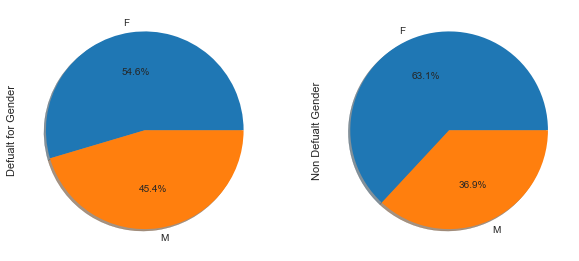

In [149]:
## Univariate for categorical
non_defaulter = non_defaulter[non_defaulter['CODE_GENDER'] != 'XNA']
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)

defaulter['CODE_GENDER'].value_counts(normalize=True).mul(100).plot(kind = 'pie', label="Defualt for Gender", autopct='%1.1f%%',shadow=True)

plt.subplot(2,2,2)
non_defaulter['CODE_GENDER'].value_counts(normalize=True).mul(100).plot(kind = 'pie',label="Non Defualt Gender",autopct='%1.1f%%',shadow=True)

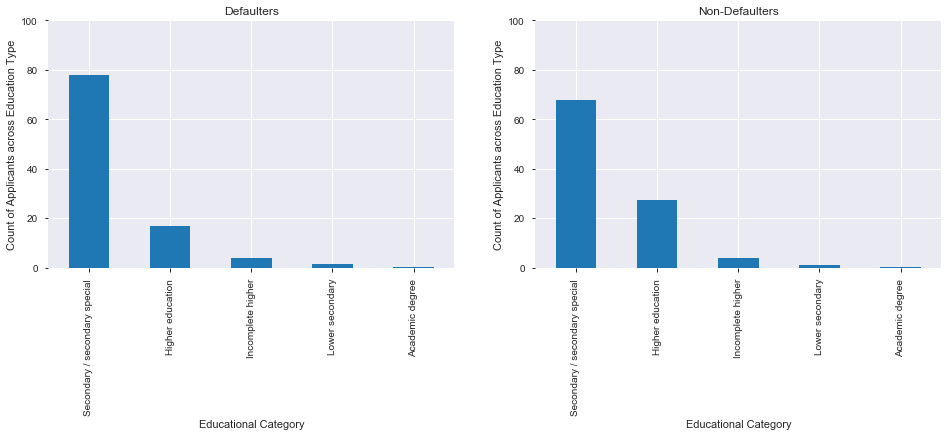

In [150]:
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
plt.title('Defaulters')
plt.ylim(0,100)
plt.ylabel('Count of Applicants across Education Type')
plt.xlabel('Educational Category')
defaulter['NAME_EDUCATION_TYPE'].value_counts(normalize=True).mul(100).plot(kind = 'bar')
plt.subplot(2,2,2)
plt.ylim(0,100)
plt.title('Non-Defaulters')
plt.ylabel('Count of Applicants across Education Type')
plt.xlabel('Educational Category')
non_defaulter['NAME_EDUCATION_TYPE'].value_counts(normalize=True).mul(100).plot(kind = 'bar')

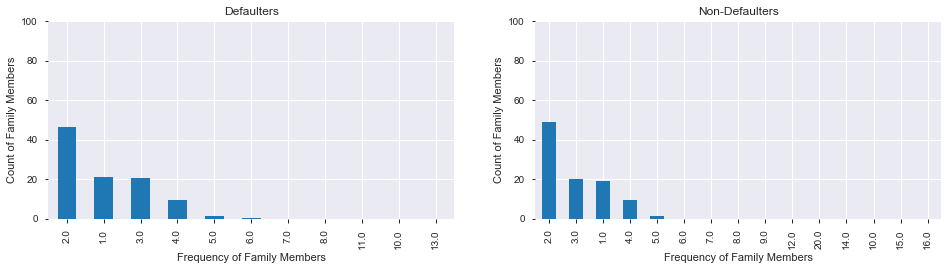

In [151]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
plt.ylim(0,100)
plt.title('Defaulters')
plt.xlabel('Frequency of Family Members')
plt.ylabel('Count of Family Members')
defaulter['CNT_FAM_MEMBERS'].value_counts(normalize=True).mul(100).plot(kind = 'bar')
plt.subplot(2,2,2)
plt.ylim(0,100)
plt.title('Non-Defaulters')
plt.xlabel('Frequency of Family Members')
plt.ylabel('Count of Family Members')
non_defaulter['CNT_FAM_MEMBERS'].value_counts(normalize=True).mul(100).plot(kind = 'bar')

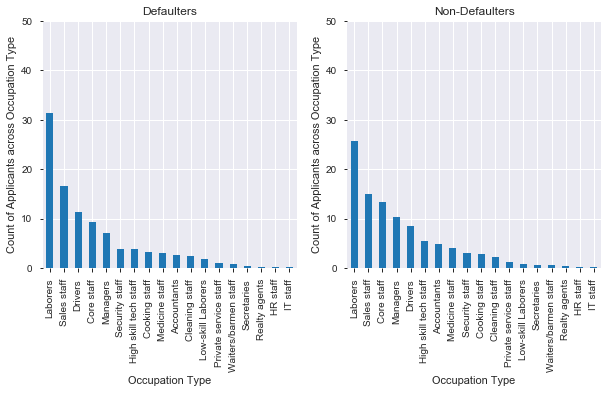

In [152]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.ylim(0,50)
plt.title('Defaulters')
plt.ylabel('Count of Applicants across Occupation Type')
plt.xlabel('Occupation Type')
defaulter['OCCUPATION_TYPE'].value_counts(normalize=True).mul(100).plot(kind = 'bar')
plt.subplot(2,2,2)
plt.ylim(0,50)
plt.title('Non-Defaulters')
plt.ylabel('Count of Applicants across Occupation Type')
plt.xlabel('Occupation Type')
non_defaulter['OCCUPATION_TYPE'].value_counts(normalize=True).mul(100).plot(kind = 'bar')

Text(0.5, 1.0, 'Age distribution')

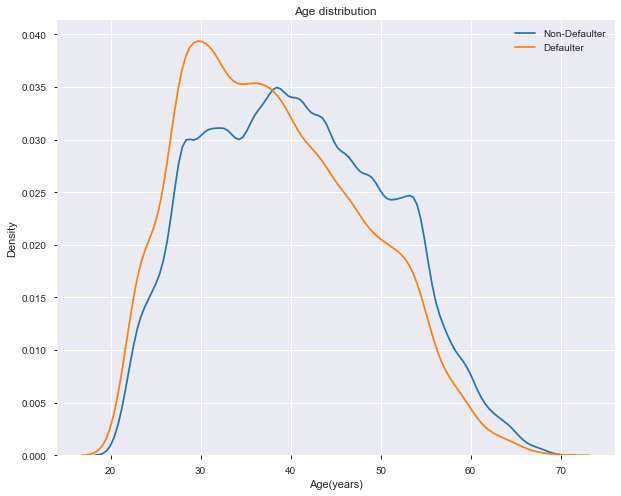

In [153]:
plt.figure(figsize=(10,8))
sns.kdeplot(analysis_df.loc[analysis_df['TARGET']==0,'AGE_OF_APPLICANT'],label='Non-Defaulter')
sns.kdeplot(analysis_df.loc[analysis_df['TARGET']==1,'AGE_OF_APPLICANT'],label='Defaulter')
plt.xlabel('Age(years)')
plt.ylabel('Density')
plt.title('Age distribution')

### Inferences from above Reports

*Please note that the defaulters rate is compared against total populace to arrive at this inference*

1. Comparing the three Pandas Profiling reports/Conventional charts, the following can be inferred 
    - Cash loans has more defaulter rate than Revolving loans
    - Male tend to default more than Female
    - People who don't own car and people with car have not-repayment rates of around 8%
    - Significance of Own house really doesn't matter for default prediction, as the default rates for people who don't have houses and the people who have houses are almost similar
    - Below is the order of default rate based on Income Category
        - People who are in income bracket of 50k to 1 lakh default the most
        - People who are in income bracket of 10k to 50k comes second
        - People who are in income bracket of 1 lakh to 5 lakh comes third
        - People who earn above 5 lakhs and less than 10 lakh default the least
        - **So we can provide loans to persons who earns between 5 lakh to 10 lakh , who are less likely to default the loan**
    - Applicants who don't provide their home phones are  likely to default than their counterparts
    - Applicants whose occupation type is Driving are ***more likely to default which is closely followed by Labourers***
    - On the other hand, Managers and Core Staff are ***less likely to default***
    - ***Elder age people (above 70) are less likely to default***
    

#### BiVariate Analysis for Defaulters and Non Defaulters

In [ ]:
#Bivariant for the two variants
newdf = defaulter[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY']]
newdf.head()
newdf.plot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', kind='scatter')
plt.show()

As seen from the above scatter plot, the credit amount ***increases*** as the amount of goods price

In [ ]:
#Correlation Analysis for Defaulters
newdf = defaulter[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY','CNT_CHILDREN','CNT_FAM_MEMBERS','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','AMT_INCOME_TOTAL']]
plt.figure(figsize = (10,10))
plt.title('Correlation Matrix for Defaulters')
sns.heatmap(newdf.corr(), annot = True,cmap="YlGnBu")

In [ ]:
#Correlation Analysis for Non-Defaulters
nondf = non_defaulter[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY','CNT_CHILDREN','CNT_FAM_MEMBERS','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','AMT_INCOME_TOTAL']]
plt.figure(figsize = (10,10))
plt.title('Correlation Matrix for Non-Defaulters')
sns.heatmap(nondf.corr(), annot = True,cmap = "YlGnBu")

```Insights & Recommendations```

1. For the non-defaulters, amount credited to them is 33% correlated with total income of the applicant. On the other hand, almost no correlation exist between Amount credited and Income of the applicant for the default category. ***Bank needs to consider income of the applicant to decide the loan amount for the applicant. By doing so, they can identify whether the applicant has required paying potential***

2. Other obvious correlations that exist in both (default and non-default) category are
    - Amount of credit is closely related to amount of goods price. This indicates that bank disburses loan almost exactly to that of goods price
    - Count of children is directly related to count of family members
    
3. Almost all other correlations match in both (default and non-default) categories


### Merging Previous Application File

In [ ]:
#Read Previous Application File
df_prev = pd.read_csv('previous_application.csv')

In [ ]:
df_prev.head()

In [ ]:
#The dataframe df_prev contains information about all previous applications for loans of clients who have loans in the main data. There is one row for each previous application related to loans in our data sample. 
#SK_ID_CURR is the key connecting both the data set
#we are perfoming inner join to retrive the matching records
application_prev_df = df.merge(df_prev, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [ ]:
#info about the merged data frame
application_prev_df.info()

### Univariate Analysis 

In [ ]:
## Univariate for categorical
#Creating a categorical function to dynamically pass the columns to plot the bar chart
def categorical(data_type):
    ax = application_prev_df[data_type].value_counts().plot(kind='bar', figsize=(10,7),
                                            color="coral", fontsize=13);
    ax.set_alpha(0.8)
    ax.set_title(str(data_type), fontsize=18)
    ax.set_ylabel("Percentage", fontsize=18);
    ax.set_yticks([0,0])
    #ax.ylim(0,50)

    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()-.03, i.get_height()+.5, \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                    color='dimgrey')

In [ ]:
categorical('NFLAG_INSURED_ON_APPROVAL')

Around 67% of Approved applicants have opted for insurance. The non-defaulter should opt for insurance for repayment of the load

In [ ]:
categorical('NAME_CLIENT_TYPE')

Around ***73.4%*** customers are repeat customers, which portrays a good image about the financial institution.

In [ ]:
#Defining a function to dynamically visualize across various variables
# Assigning a varibale temp to get the value counts of each column
#Creating a new data frame to get the temp'sindex and values
def plot_p_stats(dat_types,label_rotation=False,horizontal_layout=True):
    temp = application_prev_df[dat_types].value_counts()
    df1 = pd.DataFrame({dat_types: temp.index,'Number of application': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_prev_df[[dat_types, 'TARGET']].groupby([dat_types],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = dat_types, y="Number of application",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = dat_types, y='TARGET', order=cat_perc[dat_types], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [ ]:
plot_p_stats('CODE_GENDER')

The number of female clients is almost double the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans (around 10%), comparing with women ( around 7%).

In [ ]:
plot_p_stats('FLAG_OWN_CAR')

From the looks of the above graph, irrespective of applicant owing a car or not, the default rate is almost same

In [ ]:
plot_p_stats('CNT_CHILDREN')

Most of the clients taking a loan have no children. The number of loans associated with the clients with one children are 4 times smaller, the number of loans associated with the clients with two children are 8 times smaller; clients with 3, 4 or more children are much more rare.

As for clients with 9 or 11 children, the percent of loans not repaid is 100%.

In [ ]:
plot_p_stats('NAME_INCOME_TYPE',False,False)

Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.

The applicants with the type of income Maternity leave have maximum default, followed by Unemployed.

In [ ]:
plot_p_stats('NAME_EDUCATION_TYPE',True)

The Lower secondary category, have the largest rate of not returning the loan (around 11%). The people with Academic degree have less than 2% not-repayment rate.

In [ ]:
plot_p_stats('REG_CITY_NOT_LIVE_CITY')
plot_p_stats('REG_CITY_NOT_WORK_CITY')

Generally, much more people register in the city they live or work.

The ones that register in different city than the working or living city are more frequently not-repaying the loans than the ones that register same city (work 11% or live 12%).

### Insights and Conclusions

- Around 67% of Approved applicants have opted for insurance. The non-defaulter should opt for insurance for repayment of the load
- Around 73.4% customers are repeat customers, which portrays a good image about the financial institution.
- The number of female clients is almost double the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans (around 10%), comparing with women ( around 7%).
- From the looks of the above graph, irrespective of applicant owing a car or not, the default rate is almost same
- Most of the clients taking a loan have no children. The number of loans associated with the clients with one children are 4 times smaller, the number of loans associated with the clients with two children are 8 times smaller; clients with 3, 4 or more children are much more rare.
- As for clients with 9 or 11 children, the percent of loans not repaid is 100%.
- Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.
- The applicants with the type of income Maternity leave have maximum default, followed by Unemployed.
- The Lower secondary category, have the largest rate of not returning the loan (around 11%). The people with Academic degree have less than 2% not-repayment rate.
- Generally, much more people register in the city they live or work.
- The ones that register in different city than the working or living city are more frequently not-repaying the loans than the ones that register same city (work 11% or live 12%).